# 보스톤 집값 데이터

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수. 단위 1000달러)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
import warnings   
warnings.filterwarnings("ignore")

In [2]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


* target : medv



In [3]:
target = 'medv'

### (1) 숫자형 X --> 숫자형 Y

* 시각화 : scatter, jointplot  
* 수치화 : 상관분석  
* 관계 평가

#### ① crim(범죄율) --> medv(집값)

In [4]:
feature = 'crim'

1) 시각화 : scatter, jointplot 

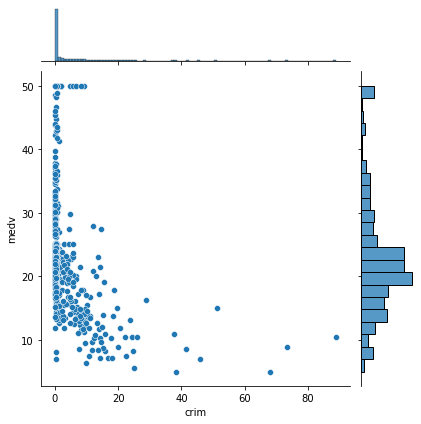

In [5]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [6]:
spst.pearsonr(boston[feature], boston[target])

(-0.38830460858681154, 1.1739870821941207e-19)

3) 관계 평가하기

* 범죄율이 높아질수록 집값은 낮아지는 경향이 분명히 보입니다.
* 상관계수가 -0.388 이므로 중간 정도의 관계라고 볼 수 있습니다.
* 여기서 P value는 상관계수가 0인지 아닌지에 대한 검정 의미 입니다.

4) 추가 분석할 내용 정리

* 범죄율 거의 0 인 지역이 집중되어 있고, 집값의 범위가 상당히 넓습니다. 그래서 따로 띄어 놓고 분석할 필요가 있습니다.
* 집값이 5만 달러에 몰려 있는 부분은 왜 그러한지 확인 필요.

#### ② ptratio(교사학생 비율) --> medv(집값)

In [7]:
feature = 'ptratio'

1) 시각화 : scatter, jointplot 

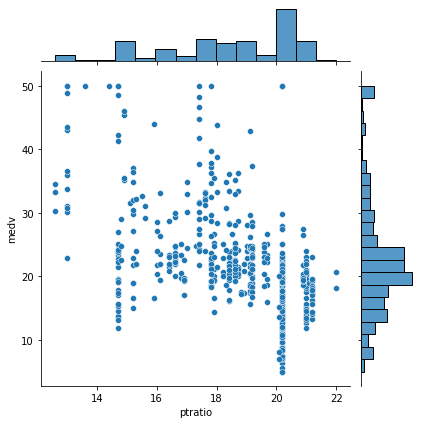

In [8]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [9]:
spst.pearsonr(boston[feature], boston[target])

(-0.5077866855375619, 1.609509478472518e-34)

3) 관계 평가하기

* 상관분석 상에는 좀 강한 상관관계를 나타냅니다.

4) 추가 분석할 내용 정리

* 상관계수는 연속된 두 숫자형간의 관계가 직선에 가까운지를 나타내는데, 직선 보다는 계단형으로 보입니다.
* 차트에서는 교사1명당 학생수가 14명 이전, 14 ~ 20, 20 ~ 으로 구분되어 보입니다.
* 이 구간을 범주로 변환해서 비교해볼 필요가 있습니다.

In [10]:
bins = [0, 14, 20, 50]
labels = ['L','M','H']
boston['ptratio2'] = pd.cut(boston['ptratio'], right = False
                           , bins = bins, labels = labels)
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2,ptratio2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,M
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,M
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0,M
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0,M
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0,M


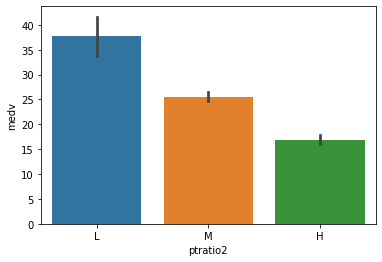

F_onewayResult(statistic=106.35920595953505, pvalue=2.997005581712739e-39)

In [11]:
sns.barplot(x='ptratio2', y=target, data=boston)
plt.show()

pt2_l = boston.loc[boston['ptratio2']=='L', target]
pt2_m = boston.loc[boston['ptratio2']=='M', target]
pt2_h = boston.loc[boston['ptratio2']=='H', target]

spst.f_oneway(pt2_l, pt2_m, pt2_h)


각 그룹별 평균 관점에서 볼때, 더 차이가 명확해 보임!

#### ③ lstat(하위계층 비율) --> medv(집값)

In [12]:
feature = 'lstat'

1) 시각화 : scatter, jointplot 

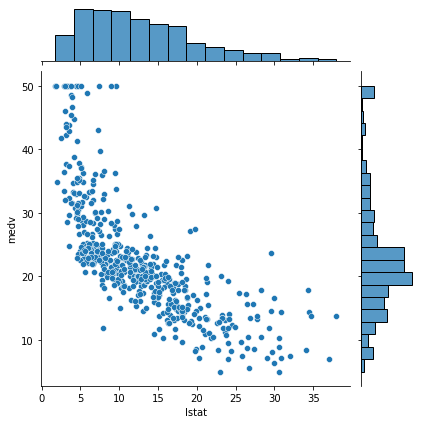

In [13]:
sns.jointplot(x = feature, y = target, data = boston)
plt.show()

2) 수치화 : 상관분석

In [14]:
spst.pearsonr(boston[feature], boston[target])

(-0.737662726174015, 5.081103394386392e-88)

3) 관계 평가하기

* 강한 상관관계!

### (2) 범주형 X --> 숫자형 Y

* 시각화 : 평균비교 barplot
* 수치화 : t-test, anova
* 관계 평가

#### ① chas(찰스강변) --> medv(집값)

In [15]:
feature = 'chas'

1) 시각화 : 평균비교 barplot

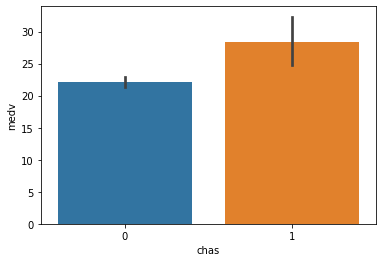

In [16]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x=feature, y=target, data=boston)
plt.show()

2) 수치화 : t-test

In [17]:
chas0 = boston.loc[boston[feature]==0, target]
chas1 = boston.loc[boston[feature]==1, target]

In [18]:
spst.ttest_ind(chas1, chas0)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

3) 관계 평가하기

* 차트와 가설검정의 결과로 볼때, 관계가 있으나 강하지는 않다.

#### ① zn2(대저택 비율 범주, 0,1,2) --> medv(집값)

In [19]:
feature = 'zn2'

1) 시각화 : 평균비교 barplot

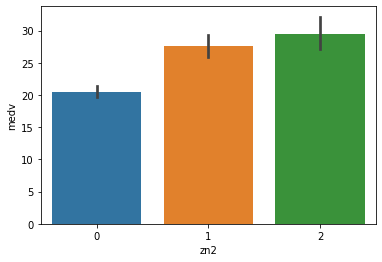

In [20]:
sns.barplot(x=feature, y=target, data=boston)
plt.show()

2) 수치화 : anova

In [21]:
zn2_0 = boston.loc[boston[feature]==0, target]
zn2_1 = boston.loc[boston[feature]==1, target]
zn2_2 = boston.loc[boston[feature]==2, target]

In [22]:
spst.f_oneway(zn2_0, zn2_1, zn2_2)

F_onewayResult(statistic=41.56175654117286, pvalue=1.9727794047741185e-17)

3) 관계 평가하기

대 저택 비율과 집값은 강한 관계를 나타낸다.

### (3) 관계 정리하기

① 강한관계

lstat, ptratio2, zn2

② 중간관계

chas, crim

### 데이터 준비

In [23]:
boston['ptratio2'].value_counts()

M    289
H    201
L     16
Name: ptratio2, dtype: int64

In [24]:
boston = pd.get_dummies(boston, columns=['ptratio2'], drop_first=True)

In [25]:
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2,ptratio2_M,ptratio2_H
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,1,0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,1,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0,1,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0,1,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0,1,0


In [26]:
# target 확인
target = 'medv'

# 데이터 분리
x = boston.drop(target, axis=1)
y = boston[target]

In [27]:
x

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,zn2,ptratio2_M,ptratio2_H
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1,1,0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0,1,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,0,1,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0,1,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,0,0,1
502,0.04527,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,0,0,1
503,0.06076,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,0,0,1
504,0.10959,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,0,0,1


In [28]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

In [30]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=2022)

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [32]:
# 선언하기
model = LinearRegression()

In [33]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [34]:
# 결과수집
result = {}
result['Linear Regression'] = cv_score.mean()

### KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
model = KNeighborsRegressor()

In [37]:
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [38]:
result['KNN'] = cv_score.mean()

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
model = DecisionTreeRegressor(random_state=2022)

In [41]:
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [42]:
# 결과수집
result['Decision Tree'] = cv_score.mean()

### SVM

In [43]:
from sklearn.svm import SVR

In [44]:
model = SVR()

In [45]:
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [46]:
# 결과수집
result['SVR'] = cv_score.mean()

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
model = RandomForestRegressor(random_state=2022)

In [49]:
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [50]:
result['Random Forest'] = cv_score.mean()

### XGBoost

In [51]:
from xgboost import XGBRegressor

In [52]:
model = XGBRegressor(random_state=2022)

In [53]:
cv_score = cross_val_score(model, x_train, y_train, cv=10)

In [54]:
result['XGBoost'] = cv_score.mean()

In [55]:
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

Linear Regression 0.694
KNN 0.604
Decision Tree 0.671
SVR 0.477
Random Forest 0.861
XGBoost 0.861


### 모델 최적화

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param = {'max_depth': range(3, 11),
         'n_estimators': range(50, 111, 10)
        }

model_xgb = XGBRegressor(random_state=2022)

model = GridSearchCV(model_xgb,
                     param,
                     cv=5,
                     scoring='r2'
                    )

In [58]:
model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=2022, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [59]:
print('최적 파라미터 :', model.best_params_)
print('성능 확인 :', model.best_score_)

최적 파라미터 : {'max_depth': 4, 'n_estimators': 50}
성능 확인 : 0.8769348063003652


In [60]:
y_pred = model.predict(x_test)

In [61]:
print('MAE :', mean_absolute_error(y_test, y_pred))
print('r2 score :', r2_score(y_test, y_pred))

MAE : 2.3949668369795147
r2 score : 0.8580098763779855
